<a href="https://colab.research.google.com/github/wlopezm-unal/Machine-learning/blob/main/exercise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
from sklearn.model_selection import train_test_split

In [ ]:
df_gender=pd.read_csv('/content/gender_submission.csv')
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Preprocessing**

In [ ]:
#Checking for null values
df_train.isnull().sum().sum()

866

In [ ]:
column_means=df_train.mean(numeric_only=True)
column_means

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#cambiar los valores nulos por la media
df_train=df_train.fillna(column_means)

In [ ]:
#verificar la cantidad de valores nulos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train['Embarked'].groupby(df_train['Embarked']).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [ ]:
#df_train_clean=df_train.dropna(axis=0, inplace=False)

In [ ]:
#reemplazar los valores nulos por la categoria que más se repite
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].value_counts().idxmax())

In [ ]:
#verificar la cantidad de valores nulos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
#Checking for duplicated
df_train.duplicated().sum()

0

In [ ]:
#Drop duplicate rows
df_train.drop_duplicates(inplace = True)
df_train.shape

(891, 12)

In [ ]:
#Drop duplicate rows
#df_train_clean.drop_duplicates(inplace = True)
#df_train_clean.shape

In [ ]:
# Value count for each value
for i in df_train.columns:
    print(i,'\n',df_train[i].value_counts())
    print('-'*90)

PassengerId 
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
------------------------------------------------------------------------------------------
Survived 
 0    549
1    342
Name: Survived, dtype: int64
------------------------------------------------------------------------------------------
Pclass 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
------------------------------------------------------------------------------------------
Name 
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A        

In [ ]:
#eliminar la columna name y cabina
df=df_train.drop(columns=['Name', 'Cabin'], inplace=False)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


categorical variables


In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#import funtion OrdinalEncoder by chance the sex ordinal to binomial. 0->female, 1->male
#import funtion OrdinalEncoder by chance the Embarked port of embarkation of ordinal to trinomial. C=Cherburgo, Q=Queenstown, S=Southampton
from sklearn.preprocessing import OrdinalEncoder
O_codificador=OrdinalEncoder()

df['Sex_encoded']=O_codificador.fit_transform(df[['Sex']]).astype('int')
df['Age']=df['Age'].astype('int')
df['Embarked_encoded']=O_codificador.fit_transform(df[['Embarked']]).astype('int')

In [ ]:
#verificar la cantidad de valores nulos
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

In [ ]:
#eliminar la columna survived y crear una nueva para que quede en la última posición del dataframe
df['Survived_']=df['Survived']
df.drop(columns='Survived', inplace=True)

In [ ]:
df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked,Survived
0,1,3,22,1,0,A/5 21171,7.2500,1,2,0
1,2,1,38,1,0,PC 17599,71.2833,0,0,1
2,3,3,26,0,0,STON/O2. 3101282,7.9250,0,2,1
3,4,1,35,1,0,113803,53.1000,0,2,1
4,5,3,35,0,0,373450,8.0500,1,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,27,0,0,211536,13.0000,1,2,0
887,888,1,19,0,0,112053,30.0000,0,2,1
888,889,3,29,1,2,W./C. 6607,23.4500,0,2,0
889,890,1,26,0,0,111369,30.0000,1,0,1


In [ ]:
#eliminar primero las siguientes columnas, para luego renombrar las columnas que pasaron de ordinal a clasificación numerica

df=df.drop(columns=['Sex', 'Embarked'], inplace=False)

In [ ]:
#renombrar las siguientes columnas para que no interfieran despues con el proceso de entrenamiento
df.rename(columns={'Embarked_encoded':'Embarked', 'Sex_encoded':'Sex', 'Survived_':'Survived'}, inplace=True)

<ipython-input-123-fe6cd27751f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived'][:-1].sort_values().plot(kind='bar')


<Axes: >

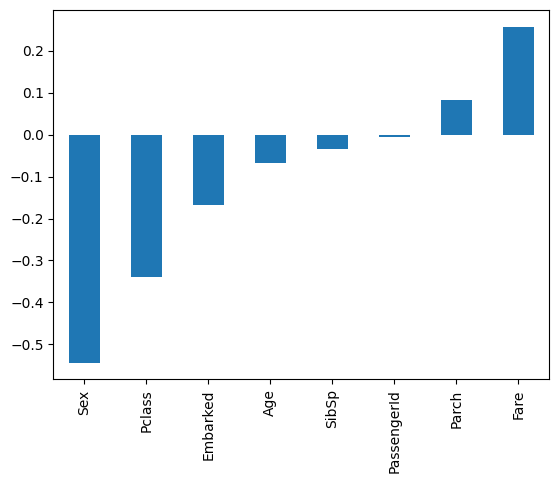

In [ ]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Survived'][:-1].sort_values().plot(kind='bar')

<ipython-input-92-20bed9189049>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')


Text(0.5, 1.0, 'Correlation Heatmap')

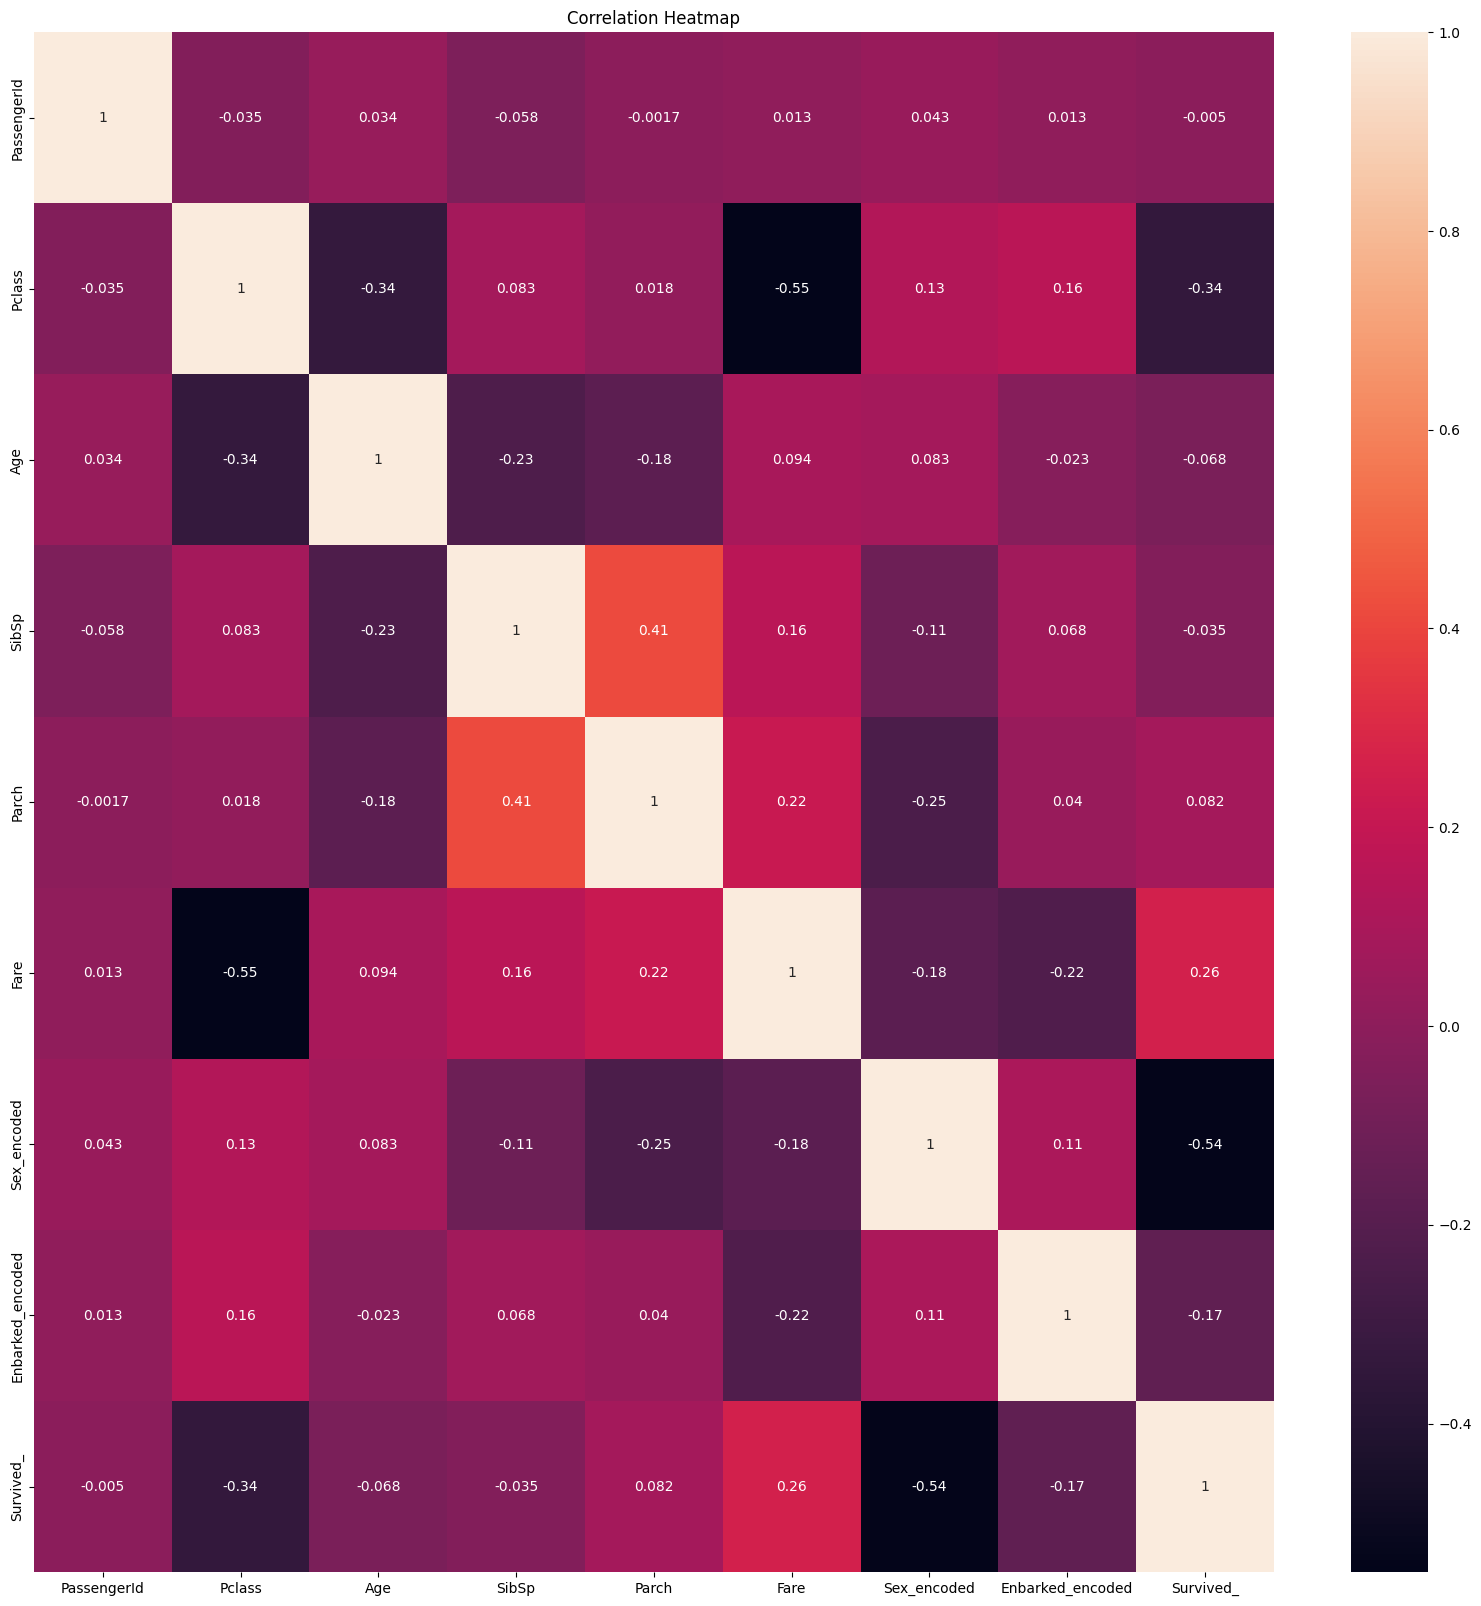

In [ ]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    int64  
 8   Embarked     891 non-null    int64  
 9   Survived     891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 76.6+ KB


Mirar el dataframe del test y hacer las respectivas limpieza de datos

In [ ]:
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test=df_test.drop(columns=['Name', 'Cabin'], inplace=False)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
O_codificador=OrdinalEncoder()

df_test['Sex_encoded']=O_codificador.fit_transform(df_test[['Sex']]).astype('int')
df_test['Age']=df['Age'].astype('int')
df_test['Embarked_encoded']=O_codificador.fit_transform(df_test[['Embarked']]).astype('int')

In [ ]:
#cambiar los valores nulos por la media
df_test=df_test.fillna(df_test.mean(numeric_only=True))

In [ ]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded,Embarked_encoded
0,892,3,male,22,0,0,330911,7.8292,Q,1,1
1,893,3,female,38,1,0,363272,7.0000,S,0,2
2,894,2,male,26,0,0,240276,9.6875,Q,1,1
3,895,3,male,35,0,0,315154,8.6625,S,1,2
4,896,3,female,35,1,1,3101298,12.2875,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,29,0,0,A.5. 3236,8.0500,S,1,2
414,1306,1,female,44,0,0,PC 17758,108.9000,C,0,0
415,1307,3,male,29,0,0,SOTON/O.Q. 3101262,7.2500,S,1,2
416,1308,3,male,34,0,0,359309,8.0500,S,1,2


In [ ]:
#saber si persisten valores nulos
df_test.isnull().sum()

PassengerId         0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

In [ ]:
#conocer el tipo de datos que hay en este dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Sex               418 non-null    object 
 3   Age               418 non-null    int64  
 4   SibSp             418 non-null    int64  
 5   Parch             418 non-null    int64  
 6   Ticket            418 non-null    object 
 7   Fare              418 non-null    float64
 8   Embarked          418 non-null    object 
 9   Sex_encoded       418 non-null    int64  
 10  Embarked_encoded  418 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


In [ ]:
for i in df_test.columns:
  print(df_test[i].value_counts())

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64
3    218
1    107
2     93
Name: Pclass, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
29    95
22    17
24    17
28    15
19    15
      ..
62     1
52     1
63     1
43     1
60     1
Name: Age, Length: 62, dtype: int64
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64
7.7500     21
26.0000    19
8.0500     17
13.0000    17
10.5000    11
           ..
8.7125      1
7.8208      1
8.5167      1
78.8500     1
22.3583     1
Name: Fare, Length: 170, dtype: int64
S    270
C    102
Q     46
Name

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Sex_encoded', 'Embarked_encoded'],
      dtype='object')

In [ ]:
#eliminar las columnas sex and Embarked , y luego renombrar Sex_encoded y Enbarked_encoded
df_test=df_test.drop(columns=['Sex', 'Embarked'], inplace=False)


In [ ]:
df_test.rename(columns={'Embarked_encoded':'Embarked', 'Sex_encoded':'Sex'}, inplace=True)

In [ ]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked
0,892,3,22,0,0,330911,7.8292,1,1
1,893,3,38,1,0,363272,7.0000,0,2
2,894,2,26,0,0,240276,9.6875,1,1
3,895,3,35,0,0,315154,8.6625,1,2
4,896,3,35,1,1,3101298,12.2875,0,2


In [ ]:
#verificar que survided no posee valores nulos
df_train["Survived"].isnull().sum()

0

In [ ]:
features = ["Pclass", "Sex", "SibSp", "Parch", 'Embarked']
X_test = df_test[features]

In [ ]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,1
1,3,0,1,0,2
2,2,1,0,0,1
3,3,1,0,0,2
4,3,0,1,1,2
...,...,...,...,...,...
413,3,1,0,0,2
414,1,0,0,0,0
415,3,1,0,0,2
416,3,1,0,0,2


In [ ]:
X = df[features]
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2
...,...,...,...,...,...
886,2,1,0,0,2
887,1,0,0,0,2
888,3,0,1,2,2
889,1,1,0,0,0


In [ ]:
X_test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,1
1,3,0,1,0,2
2,2,1,0,0,1
3,3,1,0,0,2
4,3,0,1,1,2
...,...,...,...,...,...
413,3,1,0,0,2
414,1,0,0,0,0
415,3,1,0,0,2
416,3,1,0,0,2


# **Entrenamiento del modelo de Random Forest**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", 'Embarked']
X = df[features]
X_test = df_test[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
submition=pd.read_csv('/content/submission.csv')
submition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Evaluación del modelo de random forest

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_gender['Survived'], submition['Survived'])
print(f'El valor de RandomForestClassifier es: {accuracy} ')

El valor de RandomForestClassifier es: 0.9138755980861244 


Validación cruzada para evaluar el rendimiento de un modelo\

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, df[features], df["Survived"], cv=5, scoring='accuracy')
# Calcular la precisión promedio
accuracy = scores.mean()
print("Precisión promedio:", accuracy)

Precisión promedio: 0.8047266336074321


Valores estadisticos para la precisión del modelo  Random forest

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(df_gender['Survived'], submition['Survived']))
print('f1 Score :', f1_score(df_gender['Survived'], submition['Survived'], average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(df_gender['Survived'], submition['Survived']))
print('Mean Squared Error : ',mean_squared_error(df_gender['Survived'], submition['Survived']))
print('R2 Score : ',r2_score(df_gender['Survived'], submition['Survived']))

Accuracy Score : 0.9138755980861244
f1 Score : 0.9130558200864407
Mean Absolute Error : 0.0861244019138756
Mean Squared Error :  0.0861244019138756
R2 Score :  0.6278195488721805


In [ ]:
#tabla con las predicciónes para el modelo logistic regression
submition_lr=pd.read_csv('/content/submission_lr.csv')

Valores estadisticos para la precisión del modelo: Logistic regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(df_gender['Survived'], submition_lr['Survived']))
print('f1 Score :', f1_score(df_gender['Survived'], submition_lr['Survived'], average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(df_gender['Survived'], submition_lr['Survived']))
print('Mean Squared Error : ',mean_squared_error(df_gender['Survived'], submition_lr['Survived']))
print('R2 Score : ',r2_score(df_gender['Survived'], submition_lr['Survived']))

Accuracy Score : 1.0
f1 Score : 1.0
Mean Absolute Error : 0.0
Mean Squared Error :  0.0
R2 Score :  1.0


In [ ]:
submition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# **Moodelo de regresión logistica**




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model_lr=LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X, y)
predictions_lr = model.predict(X_test)


In [ ]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_lr})
output.to_csv('submission_lr.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
submition_lr=pd.read_csv('/content/gender_submission.csv')

Evaluación del modelo re regresión logistica

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(df_gender['Survived'], submition_lr['Survived'])
print(f'El valor de LogisticRegression es: {accuracy_lr} ')

El valor de LogisticRegression es: 1.0 


Validació cruzada

In [ ]:
scores_lr=cross_val_score(model_lr, df[features], df["Survived"], cv=5, scoring='accuracy')
# Calcular la precisión promedio
accuracy_lr = scores_lr.mean()
print("Precisión promedio:", accuracy_lr)

Precisión promedio: 0.786761659657272


In [ ]:
print(f'la dimensión de y_pred es: {len(submition)} y el valor de la dimensión de y_test es:{len(df_gender)}')

la dimensión de y_pred es: 418 y el valor de la dimensión de y_test es:418


In [ ]:
submition_lr

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Evaluation metric for binary classification


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: {:.2f}".format(accuracy_score(y_test, tree_predicted)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_preducted, target_names=["not 1", "1"]))

# Decision funtions